Theoritical questions
1. Can we use Bagging for regression problems?

  Yes, Bagging can be applied to both classification and regression tasks.
  In regression, it averages the predictions of multiple regressors trained on bootstrapped samples to reduce variance.
  Example: Bagging Regressor in scikit-learn.

2. What is the difference between multiple model training and single model training?

  Single model training: Train one model (e.g., one decision tree). Predictions rely entirely on that model.
  Multiple model training (ensemble): Train many models and combine their outputs (majority vote/average). This usually gives better generalization and reduces overfitting.

3. Explain the concept of feature randomness in Random Forest.

  Random Forest adds feature randomness by:
  At each split in a tree, instead of checking all features, it selects a random subset of features.
  This decorrelates trees → makes the forest more diverse and robust.

4. What is OOB (Out-of-Bag) Score?

  In Bagging, each tree is trained on a bootstrap sample (random subset with replacement).
  About 1/3 of the data is left out (not sampled) → these are called out-of-bag samples.
  The OOB score is the accuracy/error computed using these OOB samples → works like a built-in cross-validation.

5. How can you measure the importance of features in a Random Forest model?

  Two common ways:
  Gini Importance (Mean Decrease in Impurity): How much each feature reduces impurity across all trees.
  Permutation Importance: Randomly shuffle feature values and measure the drop in accuracy → larger drop means higher importance.

6. Explain the working principle of a Bagging Classifier.

  Create bootstrap samples of the dataset.
  Train a base learner (e.g., decision tree) on each sample.
  Aggregate predictions by majority voting (classification).
  Result → lower variance and better stability.

7. How do you evaluate a Bagging Classifier’s performance?

  Use accuracy, precision, recall, F1-score (for classification tasks).
  Can also use OOB score as an unbiased estimate of generalization performance.

8. How does a Bagging Regressor work?

  Bootstrap multiple samples.
  Train regressors (e.g., decision trees) on each sample.
  Final prediction = average of predictions of all regressors.

9. What is the main advantage of ensemble techniques?

  They combine multiple models to achieve higher accuracy, lower variance, and better generalization than individual models.
  Robust to overfitting compared to a single learner.

10. What is the main challenge of ensemble methods?

  High computational cost (training many models).
  Lower interpretability (harder to explain compared to single models).

11. Explain the key idea behind ensemble techniques.

  The key idea: “Wisdom of the crowd”
  Combine many weak/average models → final model is more accurate, stable, and generalizable.

12. What is a Random Forest Classifier?

  An ensemble of decision trees built using Bagging + feature randomness.
  Prediction: majority voting among trees.
  Robust, accurate, less prone to overfitting.

13. What are the main types of ensemble techniques?

  Bagging (Bootstrap Aggregation) reduces variance.
  Boosting reduces bias.
  Stacking (Blending) combines outputs of multiple models using a meta-learner.

14. What is ensemble learning in machine learning?

  Ensemble learning is a method where multiple models are combined to solve the same problem, aiming for better performance than any individual model.

15. When should we avoid using ensemble methods?

  When interpretability is crucial (e.g., medical diagnosis with explainability).
  When computational resources are limited.
  When dataset is very small → a simple model may perform equally well.

16. How does Bagging help in reducing overfitting?

  Bagging reduces variance by averaging predictions of many models trained on different subsets.
  Outliers or noise in data don’t overly influence the final model.

17. Why is Random Forest better than a single Decision Tree?

  Single tree = high variance, prone to overfitting.
  Random Forest = many trees + randomness → reduces variance, more robust, and generalizes better.

18. What is the role of bootstrap sampling in Bagging?

  Bootstrap sampling creates multiple different training sets by sampling with replacement.
  Ensures diversity among models, making the ensemble more effective.

19. What are some real-world applications of ensemble techniques?

  Fraud detection (banking).
  Customer churn prediction.
  Medical diagnostics.
  Credit scoring.
  Recommendation systems.
  Image recognition.

20. What is the difference between Bagging and Boosting?

  Bagging
  Models built in parallel.
  Reduces variance.
  Equal weights.
  Random Forest.
  
  Boosting
  Models built sequentially.
  Reduces bias.
  Misclassified samples get higher weights.
  AdaBoost, Gradient Boosting.

In [2]:
# 1) Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X,y = make_classification(n_samples=1000, n_features=20, n_informative=6, random_state=42)
Xtr,Xte,ytr,yte = train_test_split(X,y,test_size=0.25,random_state=42)
model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
model.fit(Xtr,ytr)
print("Accuracy:", accuracy_score(yte, model.predict(Xte)))

Accuracy: 0.896


In [4]:
# 2) Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)
from sklearn.datasets import make_regression
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X,y = make_regression(n_samples=800, n_features=12, noise=12.0, random_state=1)
Xtr,Xte,ytr,yte = train_test_split(X,y,test_size=0.2,random_state=1)
model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, random_state=1)
model.fit(Xtr,ytr)
print("MSE:", mean_squared_error(yte, model.predict(Xte)))


MSE: 4299.588735795475


In [5]:
# 3) Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

data = load_breast_cancer()
X,y = data.data, data.target
Xtr,Xte,ytr,yte = train_test_split(X,y,test_size=0.2,random_state=0)
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(Xtr,ytr)
imp = rf.feature_importances_
df = pd.DataFrame({'feature': data.feature_names, 'importance': imp}).sort_values('importance', ascending=False)
print(df.head(20).to_string(index=False))


                feature  importance
        worst perimeter    0.172054
   worst concave points    0.142027
           worst radius    0.095563
    mean concave points    0.086691
         mean concavity    0.079866
         mean perimeter    0.060164
             worst area    0.050653
             area error    0.038800
              mean area    0.037145
            mean radius    0.036996
        worst concavity    0.024432
           radius error    0.024074
          worst texture    0.018593
      worst compactness    0.015655
           mean texture    0.015613
        perimeter error    0.012544
worst fractal dimension    0.010013
       mean compactness    0.009660
         worst symmetry    0.009649
       worst smoothness    0.009431


In [6]:
# 4) Train a Random Forest Regressor and compare its performance with a single Decision Tree
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X,y = make_regression(n_samples=1000, n_features=15, noise=15.0, random_state=2)
Xtr,Xte,ytr,yte = train_test_split(X,y,test_size=0.25,random_state=2)
rf = RandomForestRegressor(n_estimators=100, random_state=2)
dt = DecisionTreeRegressor(random_state=2)
rf.fit(Xtr,ytr); dt.fit(Xtr,ytr)
print("RandomForest R2:", r2_score(yte, rf.predict(Xte)))
print("DecisionTree R2:", r2_score(yte, dt.predict(Xte)))

RandomForest R2: 0.7996221083785446
DecisionTree R2: 0.47335179847833975


In [7]:
# 5) Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X,y = make_classification(n_samples=1200, n_features=10, n_informative=5, random_state=10)
Xtr,Xte,ytr,yte = train_test_split(X,y,test_size=0.25,random_state=10)
rf = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=10)
rf.fit(Xtr,ytr)
print("OOB Score:", rf.oob_score_)


OOB Score: 0.9388888888888889


In [ ]:
# 6) Train a Bagging Classifier using SVM as a base estimator and print accuracy
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X,y = make_classification(n_samples=800, n_features=20, random_state=7)
Xtr,Xte,ytr,yte = train_test_split(X,y,test_size=0.25,random_state=7)
svm = SVC(probability=False, kernel='rbf', C=1.0, gamma='scale')
model = BaggingClassifier(base_estimator=svm, n_estimators=15, random_state=7)
model.fit(Xtr,ytr)
print("Accuracy:", accuracy_score(yte, model.predict(Xte)))


In [8]:
# 7) Train a Random Forest Classifier with different numbers of trees and compare accuracy
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X,y = make_classification(n_samples=1000, n_features=20, random_state=42)
Xtr,Xte,ytr,yte = train_test_split(X,y,test_size=0.25,random_state=42)
for n in [10,50,100,200]:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(Xtr,ytr)
    print(f"n_estimators={n} -> Accuracy:", accuracy_score(yte, rf.predict(Xte)))


n_estimators=10 -> Accuracy: 0.876
n_estimators=50 -> Accuracy: 0.876
n_estimators=100 -> Accuracy: 0.88
n_estimators=200 -> Accuracy: 0.888


In [10]:
# 8) Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X,y = make_classification(n_samples=1000, n_features=20, random_state=0)
Xtr,Xte,ytr,yte = train_test_split(X,y,test_size=0.25,random_state=0)
lr = LogisticRegression(max_iter=1000)
model = BaggingClassifier(estimator=lr, n_estimators=50, random_state=0)
model.fit(Xtr,ytr)
probs = model.predict_proba(Xte)[:,1]
print("AUC:", roc_auc_score(yte, probs))


AUC: 0.9845617208190686


In [11]:
# 9) Train a Random Forest Regressor and analyze feature importance scores
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

X,y = make_regression(n_samples=900, n_features=12, noise=10.0, random_state=3)
rf = RandomForestRegressor(n_estimators=150, random_state=3)
rf.fit(X,y)
imp = rf.feature_importances_
df = pd.DataFrame({'feature': [f'f{i}' for i in range(X.shape[1])], 'importance': imp}).sort_values('importance', ascending=False)
print(df.head(10).to_string(index=False))


feature  importance
     f5    0.269844
     f4    0.196265
     f7    0.183438
     f8    0.118239
    f11    0.090807
     f6    0.054210
     f9    0.021803
     f2    0.014114
     f0    0.013667
    f10    0.013515


In [14]:
# 10) Train an ensemble model using both Bagging and Random Forest and compare accuracy
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X,y = make_classification(n_samples=1000, n_features=20, random_state=21)
Xtr,Xte,ytr,yte = train_test_split(X,y,test_size=0.25,random_state=21)
bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=21)
rf = RandomForestClassifier(n_estimators=100, random_state=21)
bag.fit(Xtr,ytr); rf.fit(Xtr,ytr)
print("Bagging Accuracy:", accuracy_score(yte, bag.predict(Xte)))
print("RandomForest Accuracy:", accuracy_score(yte, rf.predict(Xte)))


Bagging Accuracy: 0.98
RandomForest Accuracy: 0.984


In [12]:
# 11) Train a Random Forest Classifier and tune hyperparameters using GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

X,y = make_classification(n_samples=800, n_features=15, random_state=10)
Xtr,Xte,ytr,yte = train_test_split(X,y,test_size=0.25,random_state=10)
param_grid = {'n_estimators':[50,100], 'max_depth':[None,5,10], 'min_samples_split':[2,5]}
gs = GridSearchCV(RandomForestClassifier(random_state=10), param_grid, cv=3, n_jobs=-1)
gs.fit(Xtr,ytr)
best = gs.best_estimator_
print("Best params:", gs.best_params_)
print("Test Accuracy with best:", accuracy_score(yte, best.predict(Xte)))

Best params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Test Accuracy with best: 0.955


In [16]:
# 12) Train a Bagging Regressor with different numbers of base estimators and compare performance
from sklearn.datasets import make_regression
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X,y = make_regression(n_samples=700, n_features=10, noise=20.0, random_state=5)
Xtr,Xte,ytr,yte = train_test_split(X,y,test_size=0.2,random_state=5)
for n in [5,20,50,100]:
    model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=n, random_state=5)
    model.fit(Xtr,ytr)
    print(f"n_estimators={n} -> MSE:", mean_squared_error(yte, model.predict(Xte)))


n_estimators=5 -> MSE: 13489.078347064233
n_estimators=20 -> MSE: 12850.836809493347
n_estimators=50 -> MSE: 11804.476739558628
n_estimators=100 -> MSE: 12133.589973620212


In [17]:
# 13) Train a Random Forest Classifier and analyze misclassified samples
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

data = load_breast_cancer()
X,y = data.data, data.target
Xtr,Xte,ytr,yte = train_test_split(X,y,test_size=0.2,random_state=0)
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(Xtr,ytr)
y_pred = rf.predict(Xte)
mis_idx = np.where(y_pred != yte)[0]
print("Number of misclassified samples:", len(mis_idx))
if len(mis_idx)>0:
    print("First 5 misclassified indices (in test set):", mis_idx[:5])
    # show their predicted vs true
    for i in mis_idx[:5]:
        print(i, "true:", yte[i], "pred:", y_pred[i])


Number of misclassified samples: 4
First 5 misclassified indices (in test set): [10 13 14 73]
10 true: 1 pred: 0
13 true: 1 pred: 0
14 true: 1 pred: 0
73 true: 0 pred: 1


In [19]:
# 14) Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X,y = make_classification(n_samples=900, n_features=20, random_state=30)
Xtr,Xte,ytr,yte = train_test_split(X,y,test_size=0.25,random_state=30)
dt = DecisionTreeClassifier(random_state=30)
bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=30)
dt.fit(Xtr,ytr); bag.fit(Xtr,ytr)
print("DecisionTree Accuracy:", accuracy_score(yte, dt.predict(Xte)))
print("Bagging Accuracy:", accuracy_score(yte, bag.predict(Xte)))

DecisionTree Accuracy: 0.7911111111111111
Bagging Accuracy: 0.8222222222222222


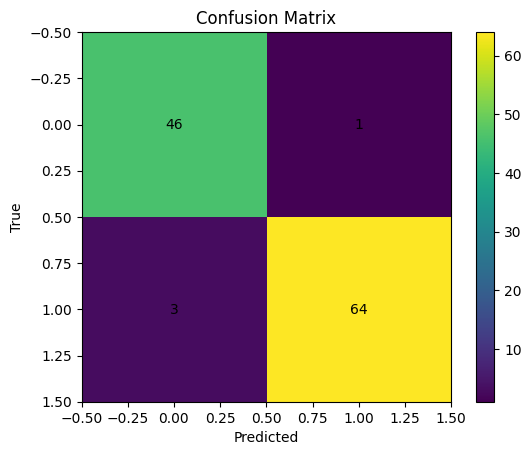

In [20]:
# 15) Train a Random Forest Classifier and visualize the confusion matrix
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

data = load_breast_cancer()
X,y = data.data, data.target
Xtr,Xte,ytr,yte = train_test_split(X,y,test_size=0.2,random_state=0)
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(Xtr,ytr)
cm = confusion_matrix(yte, rf.predict(Xte))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted"); plt.ylabel("True")
for (i,j),val in __import__('numpy').ndenumerate(cm):
    plt.text(j,i,int(val),ha='center',va='center')
plt.show()

In [21]:
# 16) Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X,y = make_classification(n_samples=1000, n_features=20, random_state=11)
Xtr,Xte,ytr,yte = train_test_split(X,y,test_size=0.25,random_state=11)
estimators = [('dt', DecisionTreeClassifier()), ('svm', SVC(probability=True)), ('lr', LogisticRegression(max_iter=1000))]
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), n_jobs=-1)
stack.fit(Xtr,ytr)
print("Stacking accuracy:", accuracy_score(yte, stack.predict(Xte)))

Stacking accuracy: 0.904


In [22]:
# 17) Train a Random Forest Classifier and print the top 5 most important features
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

data = load_breast_cancer()
X,y = data.data, data.target
rf = RandomForestClassifier(n_estimators=150, random_state=1)
rf.fit(X,y)
imp = rf.feature_importances_
df = pd.DataFrame({'feature': data.feature_names, 'importance': imp}).sort_values('importance', ascending=False)
print(df.head(5).to_string(index=False))

             feature  importance
        worst radius    0.127384
     worst perimeter    0.113257
 mean concave points    0.109994
worst concave points    0.109226
          worst area    0.101972


In [24]:
# 18) Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

X,y = make_classification(n_samples=1000, n_features=20, random_state=5)
Xtr,Xte,ytr,yte = train_test_split(X,y,test_size=0.25,random_state=5)
model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=5)
model.fit(Xtr,ytr)
yp = model.predict(Xte)
print("Precision:", precision_score(yte, yp))
print("Recall   :", recall_score(yte, yp))
print("F1-score :", f1_score(yte, yp))

Precision: 0.8905109489051095
Recall   : 0.9606299212598425
F1-score : 0.9242424242424242


In [25]:
# 19) Train a Random Forest Classifier and analyze the effect of max_depth on accuracy
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X,y = make_classification(n_samples=1000, n_features=20, random_state=2)
Xtr,Xte,ytr,yte = train_test_split(X,y,test_size=0.25,random_state=2)
for depth in [None,2,5,10]:
    rf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=2)
    rf.fit(Xtr,ytr)
    print("max_depth=", depth, " -> Accuracy:", accuracy_score(yte, rf.predict(Xte)))


max_depth= None  -> Accuracy: 0.9
max_depth= 2  -> Accuracy: 0.904
max_depth= 5  -> Accuracy: 0.904
max_depth= 10  -> Accuracy: 0.892


In [27]:
# 20) Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance
from sklearn.datasets import make_regression
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X,y = make_regression(n_samples=800, n_features=12, noise=10.0, random_state=4)
Xtr,Xte,ytr,yte = train_test_split(X,y,test_size=0.2,random_state=4)
for base in [DecisionTreeRegressor(), KNeighborsRegressor(n_neighbors=5)]:
    model = BaggingRegressor(estimator=base, n_estimators=50, random_state=4)
    model.fit(Xtr,ytr)
    print(base.__class__.__name__, "MSE:", mean_squared_error(yte, model.predict(Xte)))

DecisionTreeRegressor MSE: 7224.633370039565
KNeighborsRegressor MSE: 7808.891050076592


In [28]:
# 21) Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

data = load_breast_cancer()
X,y = data.data, data.target
Xtr,Xte,ytr,yte = train_test_split(X,y,test_size=0.2,random_state=0)
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(Xtr,ytr)
probs = rf.predict_proba(Xte)[:,1]
print("ROC-AUC:", roc_auc_score(yte, probs))

ROC-AUC: 0.9965068275643061


In [29]:
# 22) Train a Bagging Classifier and evaluate its performance using cross-validation
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

X,y = make_classification(n_samples=1000, n_features=20, random_state=9)
model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=9)
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy', n_jobs=-1)
print("CV accuracy mean:", np.mean(scores), "std:", np.std(scores))

CV accuracy mean: 0.8480000000000001 std: 0.017776388834631195


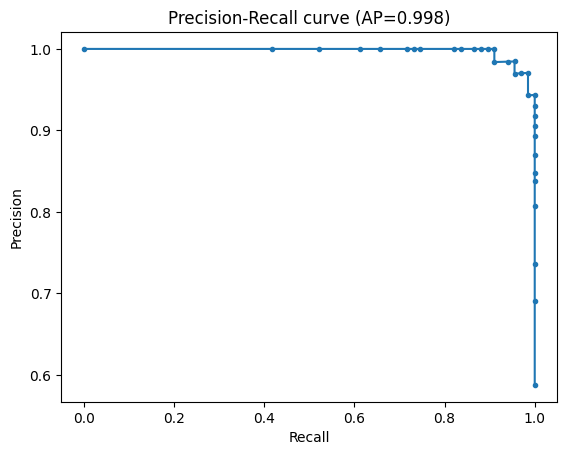

In [30]:
# 23) Train a Random Forest Classifier and plot the Precision-Recall curve
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

data = load_breast_cancer()
X,y = data.data, data.target
Xtr,Xte,ytr,yte = train_test_split(X,y,test_size=0.2,random_state=0)
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(Xtr,ytr)
probs = rf.predict_proba(Xte)[:,1]
precision, recall, _ = precision_recall_curve(yte, probs)
ap = average_precision_score(yte, probs)
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title(f"Precision-Recall curve (AP={ap:.3f})")
plt.show()

In [31]:
# 24) Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X,y = make_classification(n_samples=1000, n_features=20, random_state=15)
Xtr,Xte,ytr,yte = train_test_split(X,y,test_size=0.25,random_state=15)
estimators = [('rf', RandomForestClassifier(n_estimators=50, random_state=15))]
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), n_jobs=-1)
stack.fit(Xtr,ytr)
print("Stacking accuracy:", accuracy_score(yte, stack.predict(Xte)))

Stacking accuracy: 0.916


In [33]:
# 25) Train a Bagging Regressor with different levels of bootstrap samples and compare performance
from sklearn.datasets import make_regression
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X,y = make_regression(n_samples=700, n_features=10, noise=15.0, random_state=6)
Xtr,Xte,ytr,yte = train_test_split(X,y,test_size=0.2,random_state=6)
for bs in [0.5, 0.7, 1.0]:
    model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, bootstrap=True,
                             bootstrap_features=False, max_samples=bs, random_state=6)
    model.fit(Xtr,ytr)
    print(f"max_samples={bs} -> MSE:", mean_squared_error(yte, model.predict(Xte)))

max_samples=0.5 -> MSE: 5282.823665314332
max_samples=0.7 -> MSE: 5303.892166037884
max_samples=1.0 -> MSE: 5133.725775311355
